In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
m = pd.read_csv('meteorite-landings.csv')
m

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [5]:
m.index = m.id
del m['id']
m

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
id,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
2,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
6,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
10,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
370,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...
31356,Zillah 002,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
30409,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
30410,Zlin,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"


In [6]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45716 entries, 1 to 30414
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   nametype     45716 non-null  object 
 2   recclass     45716 non-null  object 
 3   mass         45585 non-null  float64
 4   fall         45716 non-null  object 
 5   year         45428 non-null  float64
 6   reclat       38401 non-null  float64
 7   reclong      38401 non-null  float64
 8   GeoLocation  38401 non-null  object 
dtypes: float64(4), object(5)
memory usage: 3.5+ MB


In [10]:
m.describe()

,mass,year,reclat,reclong
count,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,1.327808e+04,1991.770208,-39.122580,61.074319
std,5.749889e+05,27.176565,46.378511,80.647298
min,0.000000e+00,301.000000,-87.366670,-165.433330
25%,7.200000e+00,1987.000000,-76.714240,0.000000
50%,3.260000e+01,1998.000000,-71.500000,35.666670
75%,2.026000e+02,2003.000000,0.000000,157.166670
max,6.000000e+07,2501.000000,81.166670,354.473330


In [15]:
#i think filling in the null entries with the mean would be the best option because this way
#we dont lose any information that is missing an year and it will make calculations better
m.mean(numeric_only=True)

mass       13278.078549
year        1991.770208
reclat       -39.122580
reclong       61.074319
dtype: float64

In [18]:
met = m.fillna(m.mean())
met.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45716 entries, 1 to 30414
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   nametype     45716 non-null  object 
 2   recclass     45716 non-null  object 
 3   mass         45716 non-null  float64
 4   fall         45716 non-null  object 
 5   year         45716 non-null  float64
 6   reclat       45716 non-null  float64
 7   reclong      45716 non-null  float64
 8   GeoLocation  38401 non-null  object 
dtypes: float64(4), object(5)
memory usage: 3.5+ MB


C:\Users\malik\AppData\Local\Temp\ipykernel_4136\8451725.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  met = m.fillna(m.mean())


In [19]:
#also i will be dropping the GeoLocation column because that is just a combination of columns
# 6 and 7
meteor = met.drop(['GeoLocation'], axis=1)
meteor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45716 entries, 1 to 30414
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      45716 non-null  object 
 1   nametype  45716 non-null  object 
 2   recclass  45716 non-null  object 
 3   mass      45716 non-null  float64
 4   fall      45716 non-null  object 
 5   year      45716 non-null  float64
 6   reclat    45716 non-null  float64
 7   reclong   45716 non-null  float64
dtypes: float64(4), object(4)
memory usage: 3.1+ MB


In [20]:
meteor.describe()

,mass,year,reclat,reclong
count,4.571600e+04,45716.000000,45716.000000,45716.000000
mean,1.327808e+04,1991.770208,-39.122580,61.074319
std,5.741644e+05,27.090825,42.506276,73.913892
min,0.000000e+00,301.000000,-87.366670,-165.433330
25%,7.200000e+00,1987.000000,-76.266670,13.256125
50%,3.298500e+01,1998.000000,-39.122580,58.411565
75%,2.060000e+02,2003.000000,0.000000,155.750000
max,6.000000e+07,2501.000000,81.166670,354.473330


In [21]:
meteor['fall'].value_counts() 

Found    44609
Fell      1107
Name: fall, dtype: int64

In [22]:
meteor['nametype'].value_counts()

Valid     45641
Relict       75
Name: nametype, dtype: int64

In [23]:
meteor['recclass'].value_counts()

L6         8285
H5         7142
L5         4796
H6         4528
H4         4211
           ... 
EL7           1
CH/CBb        1
H/L~4         1
LL3.7-6       1
L/LL          1
Name: recclass, Length: 466, dtype: int64

In [24]:
meteor['recclass'] = meteor['recclass'].astype('category')
meteor['fall'] = meteor['fall'].astype('category')
meteor['nametype'] = meteor['nametype'].astype('category')
meteor['mass'] = meteor['mass'].astype('float')
meteor['year'] = meteor['year'].astype('float')
meteor.dtypes

name          object
nametype    category
recclass    category
mass         float64
fall        category
year         float64
reclat       float64
reclong      float64
dtype: object

In [25]:
meteor['recclass'] = meteor['recclass'].cat.codes
meteor['fall'] = meteor['fall'].cat.codes
meteor['nametype'] = meteor['nametype'].cat.codes
#meteor['mass'] = meteor['mass'].cat.codes
#meteor['year'] = meteor['year'].cat.codes
meteor.head()
#the features i chose to use for this analysis is recclass, fall, and nametype


,name,nametype,recclass,mass,fall,year,reclat,reclong
id,,,,,,,,
1,Aachen,1,327,21.0,0,1880.0,50.77500,6.08333
2,Aarhus,1,191,720.0,0,1951.0,56.18333,10.23333
6,Abee,1,84,107000.0,0,1952.0,54.21667,-113.00000
10,Acapulco,1,0,1914.0,0,1976.0,16.88333,-99.90000
370,Achiras,1,333,780.0,0,1902.0,-33.16667,-64.95000


<AxesSubplot:>

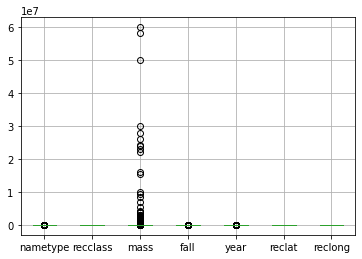

In [26]:
meteor.boxplot()

In [27]:
meteor.loc[meteor['mass'] >= 100]

,name,nametype,recclass,mass,fall,year,reclat,reclong
id,,,,,,,,
2,Aarhus,1,191,720.0,0,1951.0,56.18333,10.23333
6,Abee,1,84,107000.0,0,1952.0,54.21667,-113.00000
10,Acapulco,1,0,1914.0,0,1976.0,16.88333,-99.90000
370,Achiras,1,333,780.0,0,1902.0,-33.16667,-64.95000
379,Adhi Kot,1,84,4239.0,0,1919.0,32.10000,71.80000
...,...,...,...,...,...,...,...,...
30406,Zhongxiang,1,204,100000.0,1,1981.0,31.20000,112.50000
31355,Zillah 001,1,333,1475.0,1,1990.0,29.03700,17.01850
31356,Zillah 002,1,103,172.0,1,1990.0,29.03700,17.01850


Okay so looking at mass, it's going to be very skewed so i think we would need to reduce the amount of data that we have since there are some weights that are outliers and go over 100 grams. It would be the best for the model and catagorizing the meteors. 

In [28]:
data = meteor[~(meteor['mass'] >= 100)]  
data

,name,nametype,recclass,mass,fall,year,reclat,reclong
id,,,,,,,,
1,Aachen,1,327,21.0,0,1880.0,50.77500,6.08333
2345,Asco,1,191,41.0,0,1805.0,42.45000,9.03333
4884,Atemajac,1,333,94.2,0,1896.0,20.06667,-103.66667
4937,Banswal,1,327,14.0,0,1913.0,30.40000,78.20000
4947,Barnaul,1,184,23.2,0,1904.0,52.73333,84.08333
...,...,...,...,...,...,...,...,...
57158,Yucca 016,1,184,25.9,1,2011.0,34.82658,-114.27763
30394,Zapotitlán Salinas,1,319,27.7,1,1984.0,18.33333,-97.50000
30402,Zerga,1,378,76.0,1,1973.0,20.25000,-12.68333


array([[<AxesSubplot:title={'center':'nametype'}>,
        <AxesSubplot:title={'center':'fall'}>],
       [<AxesSubplot:title={'center':'mass'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'recclass'}>, <AxesSubplot:>]],
      dtype=object)

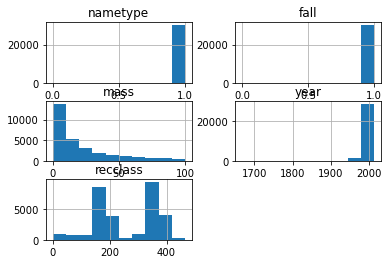

In [29]:
feat = data[['nametype', 'fall', 'mass', 'year', 'recclass']]
feat.hist()

<AxesSubplot:>

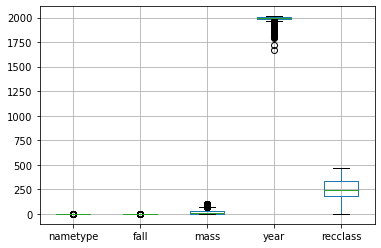

In [30]:
feat.boxplot()
#i think getting rid of the outliers was be a good idea 
#because the scaled and transformed data will have less skewness.

In [31]:
from sklearn import preprocessing as prep
scaled = prep.scale(feat)
scale = pd.DataFrame(scaled, index =feat.index, columns= feat.columns)
scale.describe()

,nametype,fall,mass,year,recclass
count,3.016000e+04,3.016000e+04,3.016000e+04,3.016000e+04,3.016000e+04
mean,-3.152778e-15,-1.928513e-14,-8.349017e-16,-3.927881e-14,-4.567047e-15
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-3.404409e+01,-1.963840e+01,-9.021167e-01,-2.680980e+01,-2.611241e+00
25%,2.937367e-02,5.092065e-02,-7.425608e-01,-6.352339e-01,-7.263581e-01
50%,2.937367e-02,5.092065e-02,-4.152666e-01,2.673374e-01,-1.424541e-01
75%,2.937367e-02,5.092065e-02,4.029688e-01,6.775971e-01,7.999874e-01
max,2.937367e-02,5.092065e-02,3.188242e+00,1.498116e+00,2.152186e+00


array([[<AxesSubplot:title={'center':'nametype'}>,
        <AxesSubplot:title={'center':'fall'}>],
       [<AxesSubplot:title={'center':'mass'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'recclass'}>, <AxesSubplot:>]],
      dtype=object)

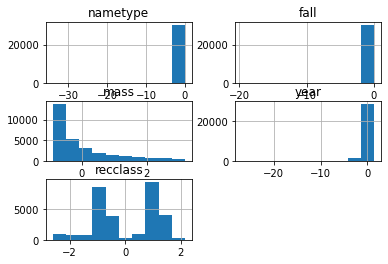

In [32]:
scale.hist()

<AxesSubplot:>

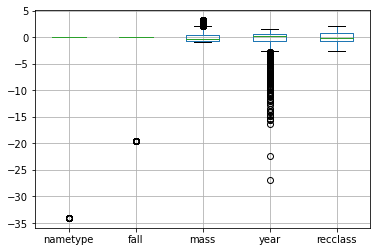

In [33]:
scale.boxplot()

In [34]:
scale.skew()
#all of my features are very skewed so i need to transform my data. 

nametype   -34.016407
fall       -19.588451
mass         1.404744
year        -4.091555
recclass    -0.246937
dtype: float64

array([[<AxesSubplot:title={'center':'nametype'}>,
        <AxesSubplot:title={'center':'fall'}>],
       [<AxesSubplot:title={'center':'mass'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'recclass'}>, <AxesSubplot:>]],
      dtype=object)

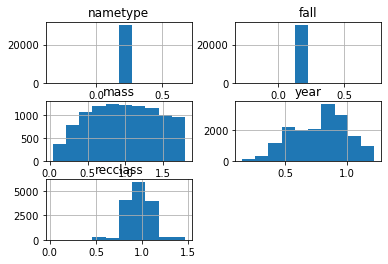

In [35]:
t = scale.apply(np.sqrt)
t.hist()

In [36]:
t.skew()

nametype    0.000000
fall        0.000000
mass       -0.030094
year       -0.331109
recclass    0.220246
dtype: float64

<AxesSubplot:>

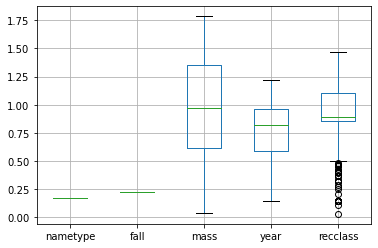

In [37]:
t.boxplot()

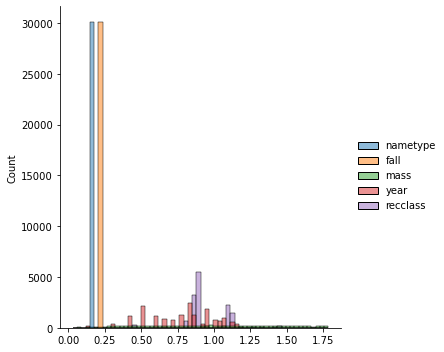

In [39]:
import seaborn as sns
sns.displot(t)

In [40]:
fill = t.fillna(t.mean())
fill.skew()

nametype    0.000000
fall        0.000000
mass       -0.051618
year       -0.438041
recclass    0.311977
dtype: float64

In [41]:
X = fill[['mass', 'nametype', 'fall', 'year']]
y = fill[['recclass']]
xx = fill[['mass', 'nametype', 'fall', 'year']]
yy = fill[['recclass']]
y=y.astype(int)
yy=yy.astype(int)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=5)
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.20, random_state=5)

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xx_train, np.ravel(yy_train))

GaussianNB()

In [46]:
yy_pred_class = nb.predict(xx_test)

In [47]:
from sklearn import metrics
print(metrics.accuracy_score(yy_test, yy_pred_class))
print(metrics.roc_auc_score(yy_test, yy_pred_class))

0.8352122015915119
0.49487503377890063


In [48]:
from sklearn import metrics
print(metrics.accuracy_score(yy_test, yy_pred_class))
print(metrics.roc_auc_score(yy_test, yy_pred_class))

0.8352122015915119
0.49487503377890063


In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=15)

In [50]:
y_pred = classifier.predict(X_test)


In [51]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


Confusion Matrix:
[[2500   75]
 [ 312  129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2575
           1       0.63      0.29      0.40       441

    accuracy                           0.87      3016
   macro avg       0.76      0.63      0.66      3016
weighted avg       0.85      0.87      0.85      3016

Accuracy: 0.871684350132626
